In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [4]:
df.shape

(400, 5)

In [6]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [7]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

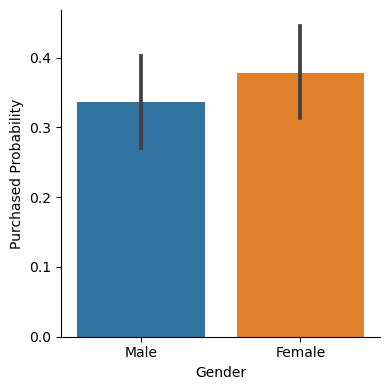

In [12]:
g = sns.catplot(x = "Gender",y = "Purchased",data = df,kind = "bar",height = 4)
g.set_ylabels("Purchased Probability")
g.set_xlabels('Gender')
plt.show

Purchased          0          1
Gender                         
Female     62.254902  37.745098
Male       66.326531  33.673469


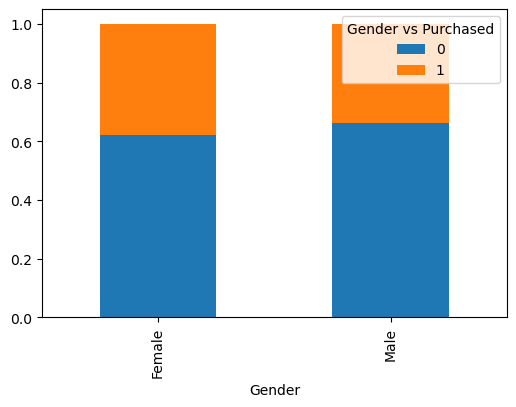

In [13]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(M2*100)
M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

(4, 4)


<Axes: >

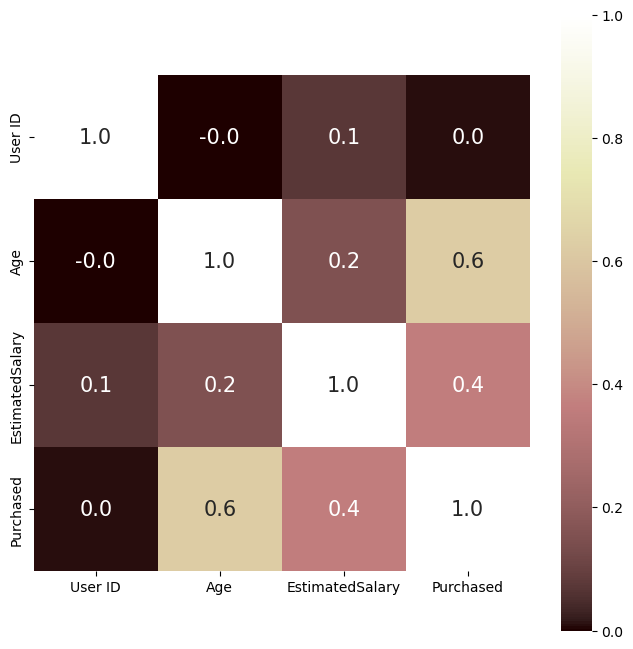

In [15]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='pink')

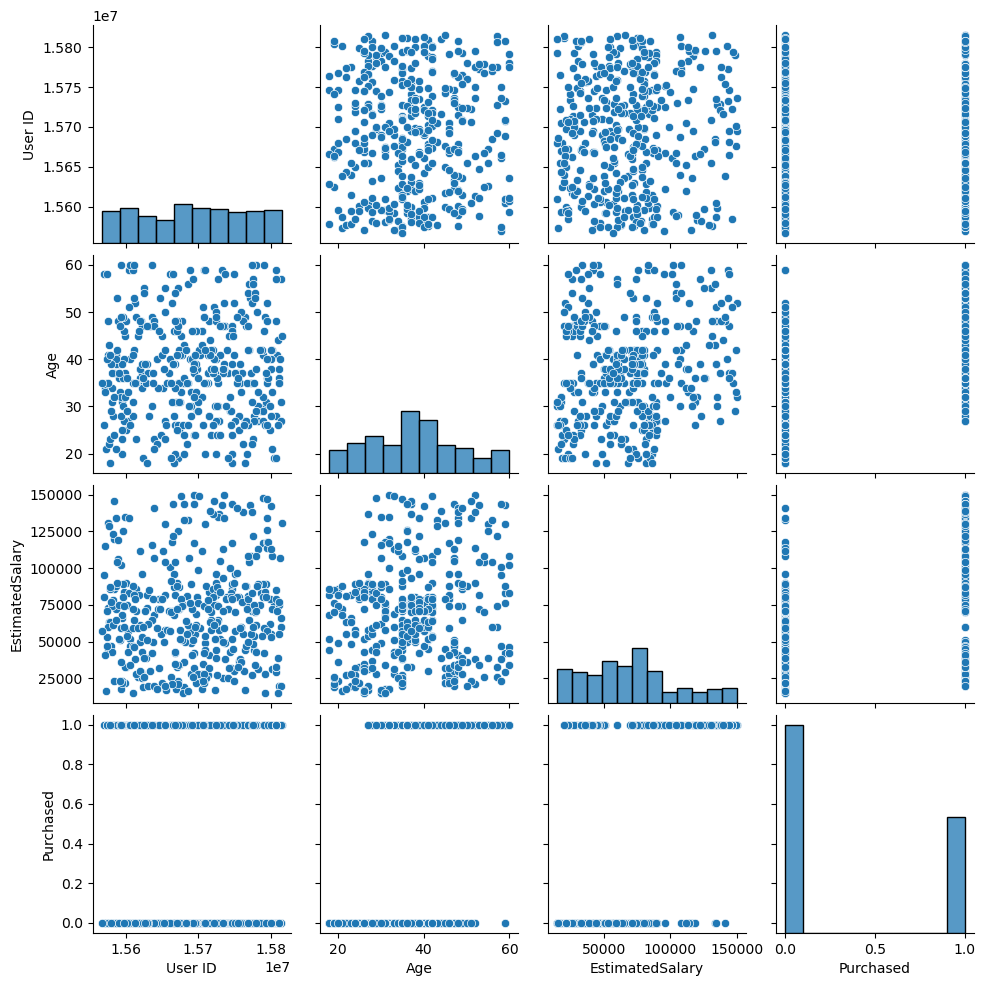

In [16]:
sns.pairplot(df)

In [17]:
X = df.drop(['Gender','Purchased'],axis=1)
Y = df['Purchased']
X.head()

User ID  Age  EstimatedSalary
0  15624510   19            19000
1  15810944   35            20000
2  15668575   26            43000
3  15603246   27            57000
4  15804002   19            76000

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [20]:
from sklearn.linear_model import LogisticRegression
obj = LogisticRegression()
obj.fit(X_train,y_train)
print("Training accuracy:", obj.score(X_train,y_train)*100)

Training accuracy: 78.75


In [21]:
y_predict= obj.predict(X_test)
print("Testing accuracy:", obj.score(X_test,y_test)*100)

Testing accuracy: 73.75


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
X=df[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [24]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5
